# Condition
In order to understand the behaviour of the condition function $k(A)  = \frac{\sigma_1}{\sigma_n}$. I want to visualise its behaviour on a simple example.
Consider the set of 2 dimensional diagonal matrices $S=\{A \in \mathbb{R}^{2\times2}/ a_{11},a_{22}>0, a_{12}=a_{21}=0\}$. Then 
$$\frac{\partial k}{\partial A} = \begin{pmatrix}
\frac{1}{a_{22}} & 0 \\
0 & -\frac{a_{11}}{a_{22}^2}
\end{pmatrix}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def derivative_condition(A):
    return np.diag([ 1/A[1,1], A[0,0]/A[1,1]**2 ])
def condition(A):
    return A[0,0]/A[1,1]

In [3]:
C=4
a = np.abs(np.random.randn()*5)
A=np.diag(np.abs(np.random.randn(2))*C)
B= a*A
print("A =")
print(A)
print(f"B = {a:1.2f}*A =")
print(B)

A =
[[6.95566362 0.        ]
 [0.         0.27957152]]
B = 2.35*A =
[[16.34542802  0.        ]
 [ 0.          0.65697774]]


#### Plot the condition for 
$$A+ \begin{pmatrix}
\epsilon & 0 \\
0 & 0
\end{pmatrix}
\text{ and } 
B + \begin{pmatrix}
\epsilon & 0 \\
0 & 0
\end{pmatrix}$$
for different matrices $A,B \in S$ and $\epsilon >0$.

In [4]:
print(f"Condition of A,B: {condition(A):.3f}, {condition(B):.3f}")
print(f"Derivative k(A):")
print(derivative_condition(A))
print(f"Derivative k(B):")
print(derivative_condition(B))

Condition of A,B: 24.880, 24.880
Derivative k(A):
[[ 3.57690223  0.        ]
 [ 0.         88.99235701]]
Derivative k(B):
[[ 1.52212158  0.        ]
 [ 0.         37.86997189]]


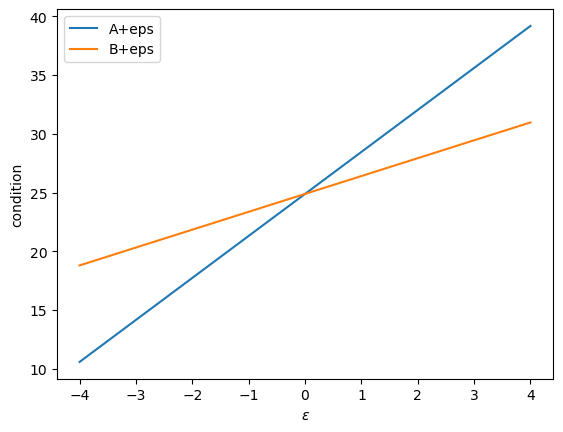

In [5]:
eps_array = np.linspace(-4,4,20)
condA = [condition(A+np.diag([eps,0])) for eps in eps_array]
condB = [condition(B+np.diag([eps,0])) for eps in eps_array]
plt.plot(eps_array,condA, label="A+eps")
plt.plot(eps_array,condB, label="B+eps")
plt.xlabel(r"$\epsilon$")
plt.ylabel("condition")
plt.legend()